In [113]:
import pandas as pd
import numpy as np
import re

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

import time

from sklearn import tree

In [114]:
df = pd.read_csv("data/spamdatasset 09032021170441.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [115]:
df.groupby('Category')['Message'].count()

Category
ham     4825
spam     747
Name: Message, dtype: int64

In [116]:
def processMessage(row, attr):
    message = re.sub('[^A-Za-z]+', ' ', row[attr])
    message = message.lower()
    return message

In [117]:
df["Message"] = df.apply (lambda row: processMessage(row, "Message"), axis=1)
df

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the nd time we have tried contact u u ...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [118]:
text_data = np.array(df['Message'])
text_data

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ',
       'ok lar joking wif u oni ',
       'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
       ..., 'pity was in mood for that so any other suggestions ',
       'the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

In [119]:
# Cria a matriz de features bag of words
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [120]:
# Pega o nome das features e mostra para conferência (só 10 primeiras)
feature_names = count.get_feature_names()
feature_names[0:10]

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel']

In [121]:
#Cria o dataframe com a bag of words contabilizando as repetições
bg_df = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
bg_df

,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zeros,zf,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
def classifier(X_train,X_test,Y_train,Y_test):    
    #Aplicando Arvore de Decisao
    print("Árvore de Decisão")
    ini = time.time() #Inicio do calculo do tempo

    dtc=tree.DecisionTreeClassifier()
    dtc.fit(X_train,Y_train)

    end = time.time()
    dtc_time = end - ini # Fim do calculo do tempo

    print(classification_report(Y_test,dtc.predict(X_test)))

    return dtc

Árvore de Decisão
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       722
        spam       0.93      0.89      0.91       114

    accuracy                           0.98       836
   macro avg       0.96      0.94      0.95       836
weighted avg       0.98      0.98      0.98       836



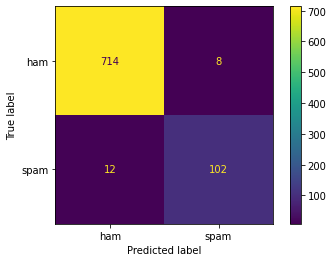

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(
    bg_df, df['Category'], test_size=0.15, random_state=0
)

dtc = classifier(X_train,X_test,Y_train,Y_test)
plot_confusion_matrix(dtc, X_test, Y_test)